In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
training_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**We have 10 classes**

# **Creating a CNN model with keras**

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(training_images, training_labels, epochs=20,  validation_data=(test_images,test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2106 - accuracy: 0.9356 - val_loss: 0.0538 - val_accuracy: 0.9821
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0827 - accuracy: 0.9755 - val_loss: 0.0379 - val_accuracy: 0.9870
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0608 - accuracy: 0.9820 - val_loss: 0.0324 - val_accuracy: 0.9891
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0293 - val_accuracy: 0.9898
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.0307 - val_accuracy: 0.9896
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0340 - val_accuracy: 0.9889
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0290 - val_accuracy:

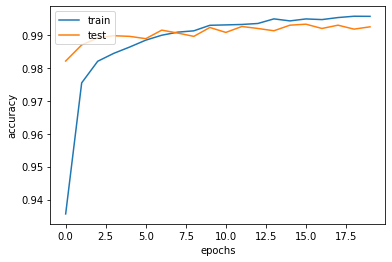

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

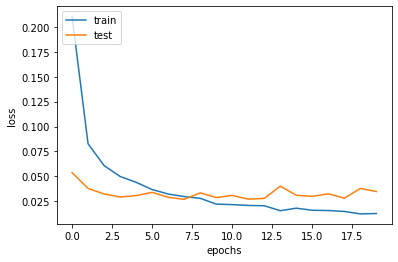

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

  **Model does not appear to be over fitting from graphs**